# Assignment 01 - Mongo
*EMSE 6586 - DBMS for Analytics*

Due **date**

*Notes:*
 - All code should follow the PEP 8 Style Guide for Python
 - Assignment should be submitted using jupyter notebooks
  - File name should follow “{Your Name} – Assignment_XX_Submission”
  - Each Task should be contained in its own cell
  - Each Task should be properly commented
  - Each Task should print out the answer to the Task if appropriate
  - Sample submission can be found on blackboard
  - **Not following these standards may result in lost points**

In [16]:
"""
pass in connection information so that it's ready to connect
then connect and rename the emse6992 connection to client
"""
from pymongo import MongoClient
import pymongo
client = MongoClient(host='3.17.135.90', #host is the hostname for the database
                     port=27017, #port is the port number that mongo is running on
                     username='student', #username for the db
                     password='emse6992pass', #password for the db
                     authSource='emse6992') #Since our user only exists for the emse6992 db, we need to specify this
db = client.emse6992

## Task 1
Write a function that takes a user's screen_name and will determine the number of statuses they've made, tweets of theirs that have been retweeted, and how many tweets they've favorited.

In [12]:

def get_stats_retweets_favs(user):
    """
    return none
    Args:
    user(string)-the name string of a user
    Returns:
    None
    This function calculates and print out the number a tweets have made, tweets of theirs that have been retweeted
    and the number of tweets they have favorited based on the name of the user
    """
    #the number of statuses they have made
    num_statuses=0
    coll = db.twitter_statuses
    docs = coll.find({"user.screen_name": user})
    for i in docs:
        num_statuses+=1
    print("the number of tweets they have made is: " + str(num_statuses))#successful
    #the number of tweets of theirs that have been retweeted
    num_retweeted=0
    coll = db.twitter_retweets
    docs = coll.find({"user_mentions.screen_name": user})
    for i in docs:
        num_retweeted+=1
    print("the number of retweets they have made is: " + str(num_retweeted))#successful
    #the number of tweets they have favorited
    num_favorited=0
    coll = db.twitter_favorites
    docs = coll.find({"favorited_by_screen_name": user})
    for i in docs:
        num_favorited+=1
    print("the number of tweets they have favorited is: " + str(num_favorited))#successful

get_stats_retweets_favs("realDonaldTrump")


the number of tweets they have made is: 2133
the number of retweets they have made is: 1321
the number of tweets they have favorited is: 8


## Task 2
Plot the distribution/histogram of user's total retweet count (*sum of {"twitter_statuses": "retweet_count"} per user*).

In the markdown cell provided, fill in the user with the most retweets.

['realDonaldTrump', 'VP', 'GOPChairwoman', 'parscale', 'PressSec', 'TuckerCarlson', 'JesseBWatters', 'WhiteHouse', 'Scavino45', 'KellyannePolls', 'Reince', 'RealRomaDowney', 'Trump', 'TrumpGolf', 'TiffanyATrump', 'IngrahamAngle', 'mike_pence', 'TeamTrump', 'DRUDGE_REPORT', 'MrsVanessaTrump', 'LaraLeaTrump', 'seanhannity', 'CLewandowski_', 'DiamondandSilk', 'KatrinaCampins', 'KatrinaPierson', 'foxandfriends', 'MELANIATRUMP', 'GeraldoRivera', 'ericbolling', 'MarkBurnettTV', 'garyplayer', 'VinceMcMahon', 'DanScavino', 'TrumpDoral', 'TrumpCharlotte', 'TrumpLasVegas', 'TrumpChicago', 'TrumpGolfDC', 'TrumpGolfLA', 'EricTrump', 'BillOReilly', 'greta', 'piersmorgan', 'DonaldJTrumpJr', 'IvankaTrump']
[43084275, 6578382, 6503147, 4590861, 12131092, 3269322, 918842, 10480269, 13285361, 5427308, 1365099, 849486, 185651, 86225, 293744, 6252830, 3459560, 11329912, 185254, 1433315, 3576766, 1253228, 2530677, 19502922, 249822, 16489759, 595263, 3175893, 588445, 2819947, 159993, 1128322, 4951802, 73599

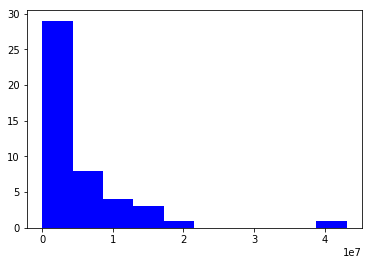

Therefore, the person who tweeted the most is: realDonaldTrump


In [16]:
#Room for work
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
total_retweet_count_list=[]
user_list=[]

"""
This part it's going to look into the database and find all the users who have had their tweets retweeted
and then calculate the total retweet count of their tweets based on their names, then plot the total retweet
count histogram and print out who has had most of the retweets
"""

#find the users whose tweets have "retweet_count" section
coll = db.twitter_statuses
docs = coll.find({'retweet_count':{"$exists":True}})

#print(docs[0])
#put all unique users into userlist
for doc in docs:
    if doc["user"]["screen_name"] not in user_list:
        user_list.append(doc["user"]["screen_name"])
print("The users are: "+user_list)

print() 


#for every user in the user_list, calculate their total retweet count and then store the total retweet count in total_retweet_count_list
#print(len(user_list))
for i in user_list:
    docs = coll.find({'user.screen_name':i})
    total_retweet_count=0
    for doc in docs:   
        #print(doc)
        for j in doc:
            #print(j)
            #print(j=="retweet_count")
            if j=="retweet_count":
                #print(doc[j])
                total_retweet_count+=doc[j]
    total_retweet_count_list.append(total_retweet_count)
print("The total number of retweets each user has are: "+total_retweet_count_list)


#plot the data within total_retweet_count_list
plt.hist(total_retweet_count_list,color="blue",label=user_list)
plt.show()


#print out who has their tweets retweeted the most
print()
user_index=total_retweet_count_list.index(max(total_retweet_count_list))
print("Therefore, the person who tweeted the most is: "+user_list[user_index])

User with most retweets:

## Task 3
Do trumps tweets that mention the wall (e.g. match a regex for 'wall') have a higher average retweet count than those that do not?

In [36]:
#Room for work
"""
This part is going to find the tweets of trump that mention the wall and don't mention the wall and calculate the
average retweet count respectively
"""
coll = db.twitter_statuses





#find
#calculate the average retweent count for tweets that mention the wall
retweet_count_trump=0
tweet_count=0
docs = coll.find({"$and":[{"text": {"$regex": 'wall', "$options": 'i'}},{"user.screen_name":"realDonaldTrump"}]})
#db.getCollection('twitter_retweets').find({"text": {$regex: 'wall', $options: 'i'}})
for i in docs:
    for j in i:
        if j=="retweet_count":
            tweet_count+=1
            #print(i["retweet_count"])
            #print(type(i["retweet_count"]))
            retweet_count_trump+=i[j]
    
print("The total number of Trump's tweets that mention the wall is: "+str(tweet_count))
print("The total retweet count of Trump's tweets that mention the wall is: "+str(retweet_count_trump))
wall_average_retweet_count=retweet_count_trump/tweet_count


#calculate the average retweet count for tweets that don't mention the wall
retweet_count_trump=0
tweet_count=0
#calculate the average retweent count for tweets that didn't mention the wall
docs = coll.find({'$and':[{'user.screen_name':'realDonaldTrump'},{'text':{'$regex':'.*','$options':'i','$nin':['wall']}}]})
for i in docs:
    for j in i:
        if j=="retweet_count":
            tweet_count+=1
            #print(i[j])
            #print(type(i["retweet_count"]))
            retweet_count_trump+=i[j]
    
    
print("The total number of Trump's tweets that don't mention the wall is: "+ str(tweet_count))
print("The total retweet count of Trump's tweets that mention the wall is: "+str(retweet_count_trump))
no_wall_average_retweet_count=retweet_count_trump/tweet_count

print("the average retweet count of tweets that mention the wall is :" + str(wall_average_retweet_count))
print("the average retweet count of tweets that didn't mention the wall is :" + str(no_wall_average_retweet_count))

#Therefore, the tweets of Trump that mention the wall actually HAVE a HIGHER 
#average retweet count than those that do not

The total number of Trump's tweets that mention the wall is: 61
The total retweet count of Trump's tweets that mention the wall is: 1485147
The total number of Trump's tweets that don't mention the wall is: 2133
The total retweet count of Trump's tweets that mention the wall is: 43084275
the average retweet count of tweets that mention the wall is :24346.67213114754
the average retweet count of tweets that didn't mention the wall is :20198.9099859353


## Task 4 
Determine the correlation between the length of a tweet and the number of times it is favorited. Can only look a limited number of tweets. numpy.corr()

In [14]:
#Room for work
"""
This part will find the tweets that have favorite_count section and store the length of the
tweets and the number of times they are favorited and calculate the correlation between them
"""
import pandas as pd
import numpy as np


#Find the tweets that have favorite_count section

coll = db.twitter_favorites
docs = coll.find({'favorite_count':{"$exists":True}})

#Set the number of tweets to 20 and for each tweet append the length of it and the favorite 
#count of it to length_list and favorited_time_list respectively.
length_list=[]
favorited_time_list=[]
for i in docs[:20]:
    length_list.append(len(i["text"]))
    favorited_time_list.append(i["favorite_count"])
print(length_list)
print(favorited_time_list)

#create a dataframe with the length_list and favorited_time_list
df=pd.DataFrame()
df['length_list']=np.array(length_list)
df['favorited_time_list']=np.array(favorited_time_list)
print(df)

#calculate the correlation between the length of tweets and the favorited_time_list with pearson method
print (df.corr(method='pearson'))

[116, 82, 140, 140, 140, 140, 140, 140, 140, 139, 121, 140, 137, 139, 68, 148, 130, 51, 68, 138]
[3486, 1711, 1522, 1522, 1522, 1522, 1522, 1522, 105765, 102293, 3262, 1767, 5360, 2819, 1691, 108696, 1908, 136694, 3384, 1391]
    length_list  favorited_time_list
0           116                 3486
1            82                 1711
2           140                 1522
3           140                 1522
4           140                 1522
5           140                 1522
6           140                 1522
7           140                 1522
8           140               105765
9           139               102293
10          121                 3262
11          140                 1767
12          137                 5360
13          139                 2819
14           68                 1691
15          148               108696
16          130                 1908
17           51               136694
18           68                 3384
19          138                 13

## Task 5
Insert a student_info object (*framework provided below*) into the student_info collection. Remember to make some more fake info up in the obj

In [2]:
sample_obj = {
    "Name": "Joel Klein",
    "Favorite Movies": [
        'Great Big Fish',
        'Princess Mononoke',
        'Memento',
        'Life is Beautiful'
    ],
    "Programming Languages": [
        {
            'Name': 'Python',
            'Years of Experience': 6,
            'Currently Use': True
        },
        {
            'Name': 'Javascript',
            'Years of Experience': 4.5,
            'Currently Use': False
        }
    ],
    "Pets": None
}

In [51]:
#Room for work
"""
This part will connect to student_info database and insert a new object to student_info database
"""
#connect to student_info database and rename it to student_coll
student_coll = db.student_info

#create a new object called obj_by_olivia
obj_by_olivia = {
    "Name": "Joel Klein",
    "Favorite Movies": [
        'Great Big Fish',
        'Princess Mononoke',
        'Memento',
        'Life is Beautiful'
    ],
    "Programming Languages": [
        {
            'Name': 'Python',
            'Years of Experience': 6,
            'Currently Use': True
        },
        {
            'Name': 'Javascript',
            'Years of Experience': 4.5,
            'Currently Use': False
        }
    ],
    "Pets": None,
    "Class Teaching":'EMSE6586'
}

#insert the new object into student_info database
student_coll.insert_one(obj_by_olivia)

#try to find any objects in student_info database that have the name set to "Joel Klein"
docs = student_coll.find({'Name':'Joel Klein'})

#print out the objects found with criteria above to make sure it worked
for i in docs:
    print(i)

{'_id': ObjectId('5c5bac61dfd8ff1b9a6d9425'), 'Name': 'Joel Klein', 'Favorite Movies': ['Great Big Fish', 'Princess Mononoke', 'Memento', 'Life is Beautiful'], 'Programming Languages': [{'Name': 'Python', 'Years of Experience': 6, 'Currently Use': True}, {'Name': 'Javascript', 'Years of Experience': 4.5, 'Currently Use': False}], 'Pets': None, 'Class Teaching': 'EMSE6586'}
{'_id': ObjectId('5c5c4e99dfd8ff1b9a6d9426'), 'Name': 'Joel Klein', 'Favorite Movies': ['Great Big Fish', 'Princess Mononoke', 'Memento', 'Life is Beautiful'], 'Programming Languages': [{'Name': 'Python', 'Years of Experience': 6, 'Currently Use': True}, {'Name': 'Javascript', 'Years of Experience': 4.5, 'Currently Use': False}], 'Pets': None, 'Class Teaching': 'EMSE6586'}
